# Visualizing Distributions

- `sns.histplot()`
- `sns.kdeplot()`

If we want to see the shape of a data distribution, the **histogram** can be a good choice. From a histogram we can easily see if a data distribution:

* is unimodal or multimodel
* has skew, or is symmetrical
* differs between two samples

In this section we will see how to plot a histogram using Python and what choices we can make to show the data distribution clearly and accurately

We will also consider some of the limitations of the histogram for small datasets, and explore a related plot, the **Kernel Density Estimate (KDE)** plot, which can mitigate these limitations.

To summarize the conceptual content of this page, when plotting a histogram we should consider:

* the width of the bins - narrow bins give more detail but may make it harder to perceive the overall pattern
    * the KDE-plot equivalent is **bandwidth** which determines the smoothness of the KDE shape
* the bin boundaries - do we want to place them at round numbers or some other meaningful point?

When using histograms (and KDE plots) to compare distributions, we should consider:

* matching the scale on the axes to facilitate comparison
* whether to place the two plots next to each other (horizontally), above one another (vertically) or overlaid (on the same axis), to facilitate comparison


## Example

We will look at a small sample of height data (these are made-up data designed for the exercise).

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/tallVshort.jpg" width="50%" />

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Load and inspect the data

Load the file BodyData.csv which contains body measurements for 50 (fictional) people

In [2]:
heightData = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/BodyData.csv')
display(heightData)

,ID,sex,height,weight,age
0,101708,M,161,64.8,35
1,101946,F,165,68.1,42
2,108449,F,175,76.6,31
3,108796,M,180,81.0,31
4,113449,F,179,80.1,31
5,114688,M,172,74.0,42
6,119187,F,148,54.8,45
7,120679,F,160,64.0,44
8,120735,F,188,88.4,32
9,124269,F,172,74.0,29


## Histogram

Let's start by plotting a histogram of the data to see what the distribution of heights is.

We use the `Seaborn` function `sns.histplot()`

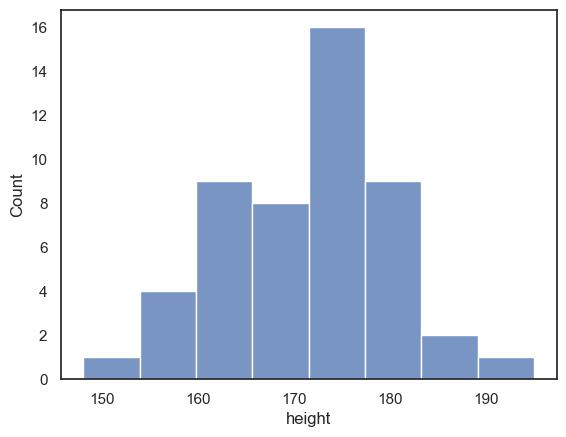

In [3]:
sns.histplot(data = heightData, x="height")
plt.xlabel('height') # set the x axis label
plt.show() # this command asks Python to output the plot created above 

If we want to *disaggregate* (separate out) the data, for example by sex, this is super easy using the `hue` property in `Seaborn` functions:

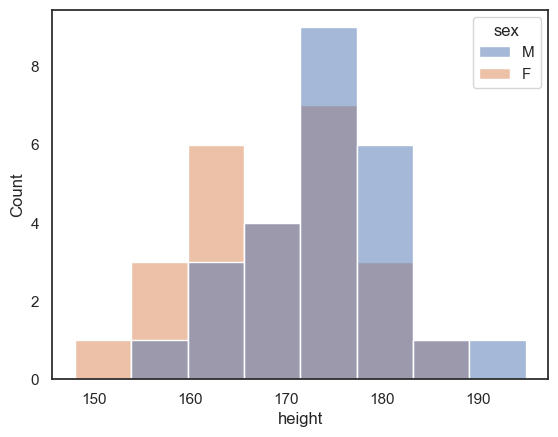

In [4]:
sns.histplot(data = heightData, x="height", hue="sex")
plt.xlabel('height') # set the x axis label
plt.show() # this command asks Python to output the plot created above 

### Choosing the bin boundaries and width

In a histogram, we group data into *bins*, and count how many data values fall in each bin

By default, `Seaborn` chooses a set of bins that its algorithm suggests should best display the shape of the data distribution. 

However, we may prefer to set the bin widths to values that are more easily interpretable. 

For example, below I used bins of 5cm to group the heights (in a range from 150 to 200 cm that includes all the data points in my sample). This means I can easily read off from the graph how many men in my sample have a height between, say, 170 and 175cm). 

* Can you find where in the code this is specified?


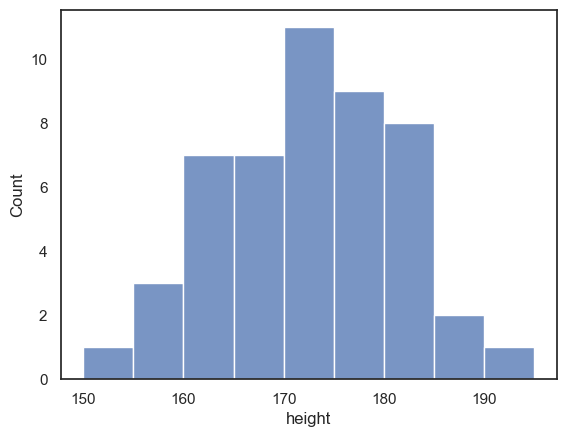

In [5]:
sns.histplot(data = heightData, x="height", bins = range(150,200,5))
plt.show() # this command asks Python to output the plot created above

### Histogram is unstable for small $n$

One problem with using a histogram when you have only a small number of data points is 
that the shape of the histogram can depend a lot on where the bin boundaries happen to fall. 

Look at the following plot of brothers' heights, again grouped into 5cm bins but with different bin boundaries: 

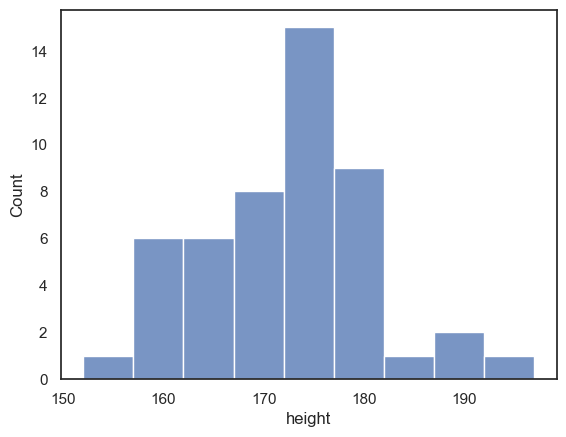

In [6]:
sns.histplot(data = heightData, x="height", bins = range(152,202,5))
plt.show()

Compare the histogram to the one above with  bin boundaries at 150, 155 etc. The shape of the distribution looks quite different! In the top plot, we seem to have quite a broad distribution, whereas in the bottom one, there is a big spike of people with heights betweem 172 and 177 cm.

Moving the bin boundaries changed how many observations fell in each bin and thus the shape of the histogram. This can happen easily just due to chance when you have a small number of observations in each bin (check the y-axis in the above histogram - you can see that most bins contain fewer than 10 people, which means that moving just one or two observations between bins makes a big difference to the apparent shape of the histogram).

For this reason, a histogram may not be the best representation of the data for a small sample.

#### Exercises
* What change in the code moved the bin boundaries?
* What were the old bin boundaries? What are the new bin boundaries?
* Create a new histogram in which the bin boundaries are at 153,158,163 etc

In [7]:
# your code here!

### Bin width

The code below creates histograms of the mens' heights
* try changing the bin width to 1cm - can you guess how to do this?
    * note how much spikier the histogram looks with 1cm bins - it is hard to see the overall shape of the distribution

In [8]:
# your code here!

## KDE plot

Whist a histogram shows the number of observations in each of a set of discrete bins, the KDE plot estimates a smooth distribution shape that fits the underlying observations. 

You can think of it as the average of all the histograms you would get if you tried all the possible sets of bin boundaries (for a fixed bin width).

We can add a kde plot to the histogram by adding an extra <i>argument</i> to the function <tt>sns.histplot</tt>. Here we reproduce the two different histograms of brothers' heights with different bin boundaries, with the KDE plot added.


* although the histograms look rather different, the KDE plots look exactly the same as each other

*note-*

* I used some additional commands from `Matplotlib` to make sure the x and y axes cover the same range of values for both plots, to make them easier to compare

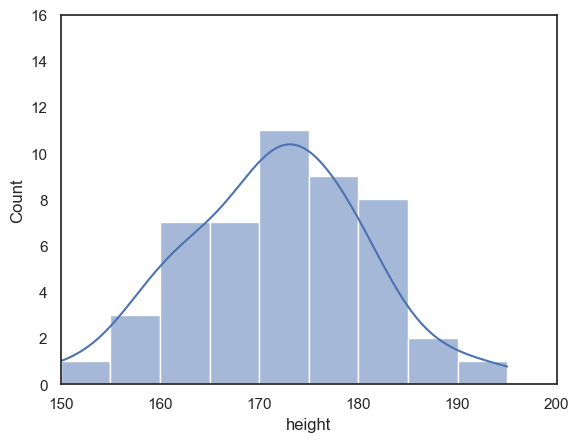

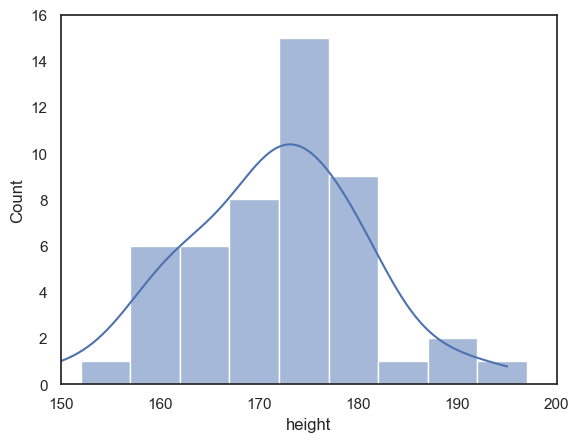

In [9]:
sns.histplot(data = heightData, x="height", bins = range(150,200,5), kde="True")
plt.xlim(150,200) 
plt.ylim(0,16)
plt.show()
# note that without the command plt.show(), Jupyter will put all plots onto the same axes, 
# or (if that is impossible, eg when different plot types were used) 
# display only the final plot created in the cell

sns.histplot(data = heightData, x="height", bins = range(152,202,5), kde="True")
plt.xlim(150,200) 
plt.ylim(0,16)
plt.show()



#### Exercises

* Can you find the extra argument that adds the KDE plot?
* Try to switch the KDE plot off!

## KDE plot (without histogram)

If you don't want the histogram, you can plot the KDE plot independently (without a histogram), using the `Seaborn` function `sns.kdeplot()`

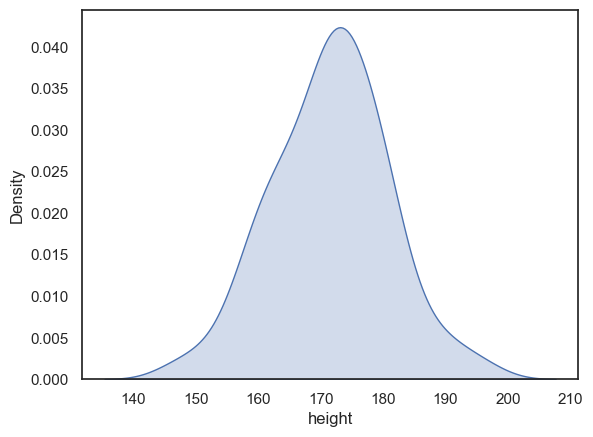

In [10]:
sns.kdeplot(data = heightData, x="height", fill=True) # I think KDE plots look nice filled with shading, hence fill=True
plt.xlabel('height') # set the x axis label
plt.show()

### Probability density

When we plot the KDE as a standalone (rather than over a histogram) the x-axis changes to 'Density' rather than 'count'. 

The values of density are such that the area under the curve of the KDE plot is 1. Technically it is a <i>probability density</i>. It means that probabilities could be read off the graph - so the probability of a member of our sample (one of the brothers) having a height between 160 and 170cm is the same as the area under the curve between 160 and 170cm.

• this is calculated as 10cm (width of the shaded area) x 0.025 (average 'density' in this area) = 0.25 or 25%

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/densityFig.png" width="50%" />

One consequence of this is that you cannot tell from the KDE plot how many data points were in the dataset (which we should care about, as laarger datasets are more likely to reliably represent the population!). To counter this you can add a **rugplot**, which shows the individual datapoints - this gives you 'the best of both worlds'

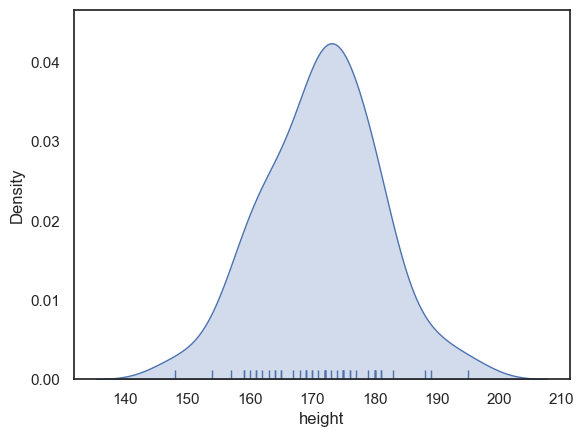

In [11]:
sns.kdeplot(data = heightData, x="height", fill=True)
sns.rugplot(data = heightData, x="height")
plt.xlabel('height') # set the x axis label
plt.show()

### Bandwidth

I said you can think of the KDE plot as a kind of average of all the histograms you would get if you tried all the possible locations for bin boundaries (150,155,160, vs 151,156,161 etc)

This is true but it only averages histograms for one possible bin <i>width</i>, which is chosen by the computer to give (generally) a good result.

You saw above that changing the bin width from 5cm to 1cm changed the balance between showing to overall shape of the distribution (where is the main peak) vs the details (details more visible with a small bin boundary). Bandwidth does the equivalent adjustment in a KDE plot.

The code below shows the height KDE with three bandwidths. The argument <tt>bw_adjust</tt> is a scaling factor for the default bandwidth chosen by the computer:

* If <tt>bw_adjust = 1.0</tt> the default bandwidth is used (grey KDE)
* If <tt>bw_adjust = 0.5</tt>, a narrower bandwith of half the default is used (red KDE)
* If <tt>bw_adjust = 2.0</tt>, a wider bandwith of twice the default is used (blue KDE)



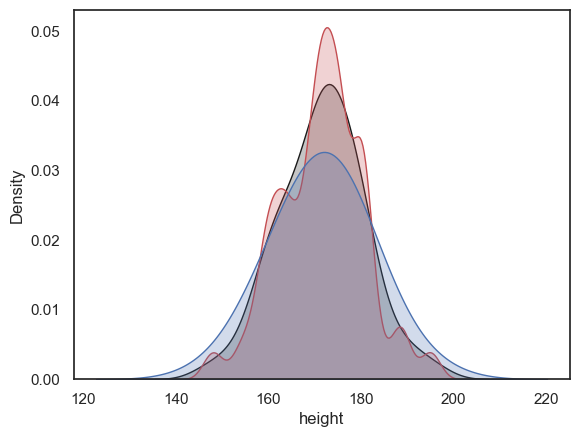

In [12]:
sns.kdeplot(data = heightData, x="height", fill=True, bw_adjust=1.0, color='k')
sns.kdeplot(data = heightData, x="height", fill=True, bw_adjust=0.5, color='r')
sns.kdeplot(data = heightData, x="height", fill=True, bw_adjust=2.0, color='b')
plt.xlabel('height') # set the x axis label
plt.show()

**Note** With its high bandwidth, the blue KDE plot looks very smooth with just one peak. 

In contrast, with low bandwidth, the red KDE plot tracks local peaks in the data distribution, resulting in lots of little bumps in the KDE plot.

#### Exercise

Try out some different values for <tt>bw_adjust</tt> - can you make the KDE plot go even wobblier? or even smoother?

## Considerations when comparing distributions

Histograms and KDE plots are good for showing the shape of a data distribution, and hence they are also good for comparing the shape of multiple data distributions

An easy way to commpare two groups is to overlay the histograms or KDE plots, using the `hue` property:

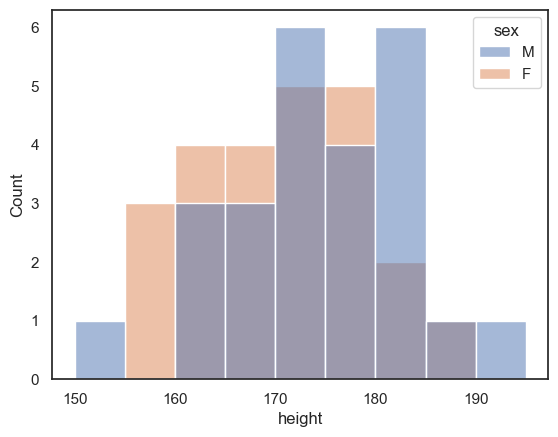

In [13]:
sns.histplot(data = heightData, x="height", hue='sex', bins = range(150,200,5))
plt.show()

You might find that too crowded in which case you may want to separate out the plots onto two separate axes:

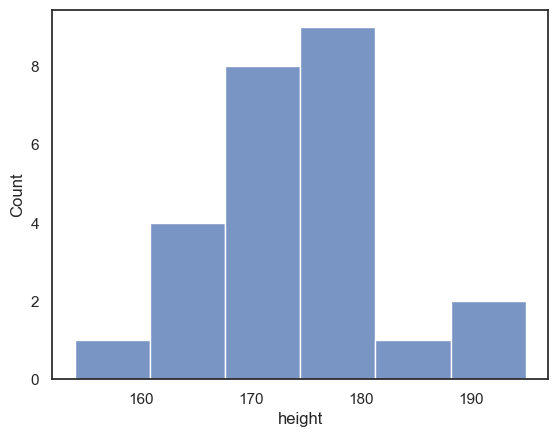

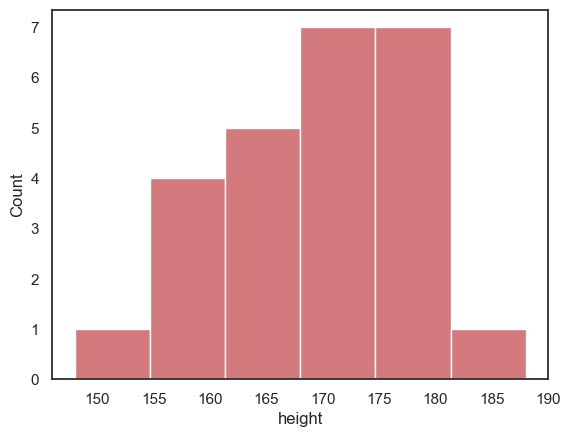

In [14]:
sns.histplot(data = heightData.query('sex=="M"'), x="height", color='b')
plt.show()

sns.histplot(data = heightData.query('sex=="F"'), x="height", color='r')
plt.show()

However, when we try to compare the two plots on separate axes, the matter is confused by non-matching axis ranges

* It looks like there are more tall women than tall men, because the peak fo the distribution is further right for the women - but check out the numbers on the $x$-axes
* The most common bin for men contains 9 people, but for women, 7 people - this is not immediately apparent as the $y$-axes don't match
* luckily `seaborn` grouped both men and women into 6 bins - but the bin widths are not actually the same in the two plots

To make the plots more directly comparable, we should fix the range of $x$ and $y$ axes and the bin boundaries on both plots:

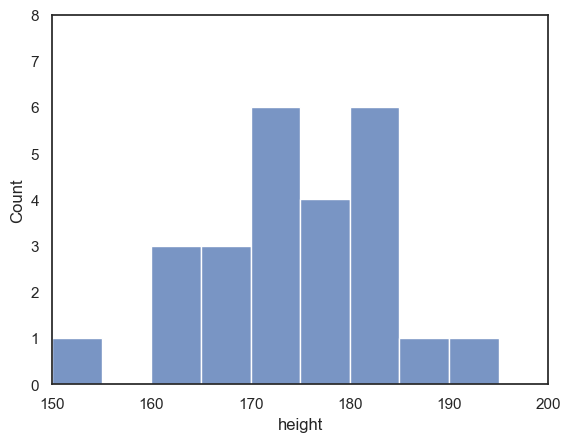

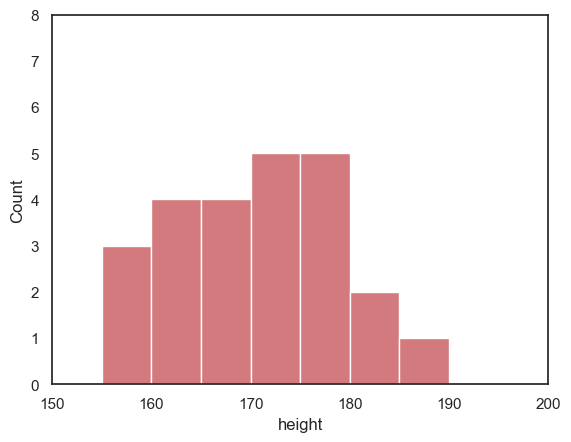

In [15]:
sns.histplot(data = heightData.query('sex=="M"'), x="height", color='b', bins=range(150,200,5))
plt.xlim(150,200)
plt.ylim(0,8)
plt.show()

sns.histplot(data = heightData.query('sex=="F"'), x="height", color='r', bins=range(150,200,5))
plt.xlim(150,200)
plt.ylim(0,8)
plt.show()

## Controlling plot placement with `plt.subplot()`

If we make one plot after another as above, they appear in a vertical series.

We might prefer them to sit next to eachother horizontally. Or, if we have multiple plots, to be arranged in a 2x2 or 2x3 grid.

This can be achieved using the `matplotlib` function `plt.subplot()`, which creates a grid of axes and places each figure within it.

For example, a 2x1 grid (2 rows, 1 column):

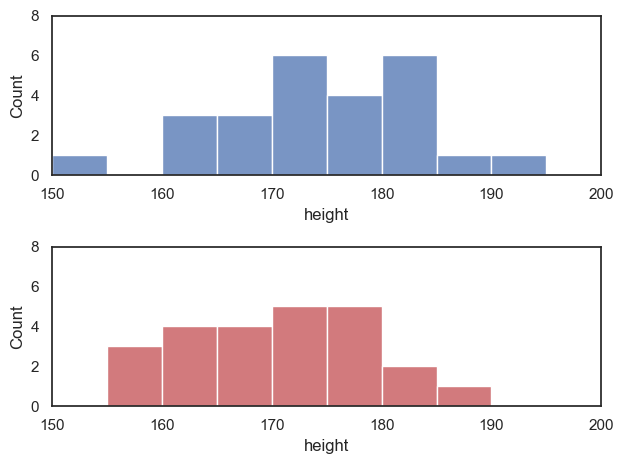

In [16]:
plt.subplot(2,1,1)
sns.histplot(data = heightData.query('sex=="M"'), x="height", color='b', bins=range(150,200,5))
plt.xlim(150,200)
plt.ylim(0,8)

plt.subplot(2,1,2)
sns.histplot(data = heightData.query('sex=="F"'), x="height", color='r', bins=range(150,200,5))
plt.xlim(150,200)
plt.ylim(0,8)

plt.tight_layout() # optimize the white space between the axes - needed when using plt.subplot()
plt.show()

... or a 1x2 grid (one row, 2 columns)

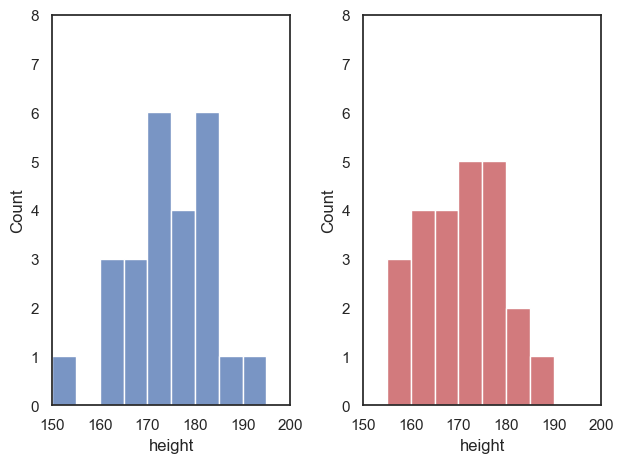

In [17]:
plt.subplot(1,2,1)
sns.histplot(data = heightData.query('sex=="M"'), x="height", color='b', bins=range(150,200,5))
plt.xlim(150,200)
plt.ylim(0,8)

plt.subplot(1,2,2)
sns.histplot(data = heightData.query('sex=="F"'), x="height", color='r', bins=range(150,200,5))
plt.xlim(150,200)
plt.ylim(0,8)

plt.tight_layout() # optimize the white space between the axes - needed when using plt.subplot()
plt.show()

Perhaps you will agree that the vertical arrangement allows for an easier comparison between men and women in this case - in the vertical arrangement we can easily see that the men are generally taller

#### Multiple plots in a grid

Say we now want to plot weights as well as heights - how about a 2x2 grid (2 rows, 2 columns)?

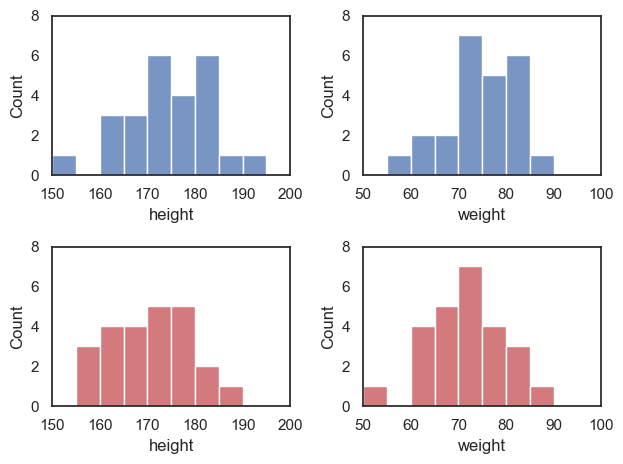

In [18]:
plt.subplot(2,2,1)
sns.histplot(data = heightData.query('sex=="M"'), x="height", color='b', bins=range(150,200,5))
plt.xlim(150,200)
plt.ylim(0,8)

plt.subplot(2,2,2)
sns.histplot(data = heightData.query('sex=="M"'), x="weight", color='b', bins=range(50,100,5))
plt.xlim(50,100)
plt.ylim(0,8)

plt.subplot(2,2,3)
sns.histplot(data = heightData.query('sex=="F"'), x="height", color='r', bins=range(150,200,5))
plt.xlim(150,200)
plt.ylim(0,8)

plt.subplot(2,2,4)
sns.histplot(data = heightData.query('sex=="F"'), x="weight", color='r', bins=range(50,100,5))
plt.xlim(50,100)
plt.ylim(0,8)

plt.tight_layout() # optimize the white space between the axes - needed when using plt.subplot()
plt.show()

The syntax of `plt.subplot()` is:
* the first number inside brackets is the number of **rows** of axes within your compound figure
* the second number inside brackets is the number of **columns** of axes within your compound figure
* the third number inside brackets is the location in which you want to place the next plot, numbered as if reading from top to bottom and left to right - some examples are shown in the following figure



## Customizing the appearance of your plots

I told you that `seaborn` produces publication quality figures, but some of the figures above look a bit ugly.

We can easily change the appearance of our plots using some additional arguments to the functions `sns.histplot()` and `sns.kdeplot()`.

You can find many examples of how to change the appearance of histograms and KDE plots in the `seaborn` manual pages:
for <a href='https://seaborn.pydata.org/generated/seaborn.histplot.html'><tt>sns.histplot()</tt></a> and <a href='https://seaborn.pydata.org/generated/seaborn.kdeplot.html'><tt>sns.kdeplot()</tt></a>      

